In [1]:
import os
import pandas as pd
import xlrd
import time
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

### 1) Retrieve the encoded data

In [2]:
acase_0_df = pd.read_csv("encoded_case_a_0.csv", index_col = 0)

In [3]:
bcase_0_df = pd.read_csv("encoded_case_b_0.csv", index_col = 0)

In [4]:
ccase_0_df = pd.read_csv("encoded_case_c_0.csv", index_col = 0)

In [5]:
dcase_0_df = pd.read_csv("encoded_case_d_0.csv", index_col = 0)

In [6]:
labels_0_df = pd.read_csv("encoded_labels.csv", index_col = 0)

In [7]:
df = pd.read_excel("OECD_All_v3.xlsx", sheet_name = "All")

### 2) Check for univariate outliers

Defining the univariate outliers detection methods Z-Score and IQR

In [27]:
#Any value higher than 1.5 * IQR above the third quartile or below the first quartile will be considered an outlier.

def iqr(variable_as_list):
    Q1 = np.percentile(variable_as_list, 25, interpolation = 'midpoint') 
    Q2 = np.percentile(variable_as_list, 50, interpolation = 'midpoint') 
    Q3 = np.percentile(variable_as_list, 75, interpolation = 'midpoint') 
    IQR = Q3-Q1
    low_lim = Q1 - 1.5*IQR
    up_lim = Q3 + 1.5*IQR
    outliers_idx = []
    outliers_ele = []
    outliers_up_diff = []
    outliers_low_diff = []
    for i in range(0, len(variable_as_list)):
        up_diff = variable_as_list[i] - up_lim
        low_diff = variable_as_list[i] - low_lim
        if ((up_diff > 0) or ( low_diff < 0)):
            outliers_idx.append(i)
            outliers_ele.append(variable_as_list[i])
            outliers_up_diff.append(up_diff)
            outliers_low_diff.append(low_diff)
    return(outliers_idx, outliers_ele, outliers_up_diff, outliers_low_diff)

2.1) Case A (funding related variables/fields)

Box plot of each variable

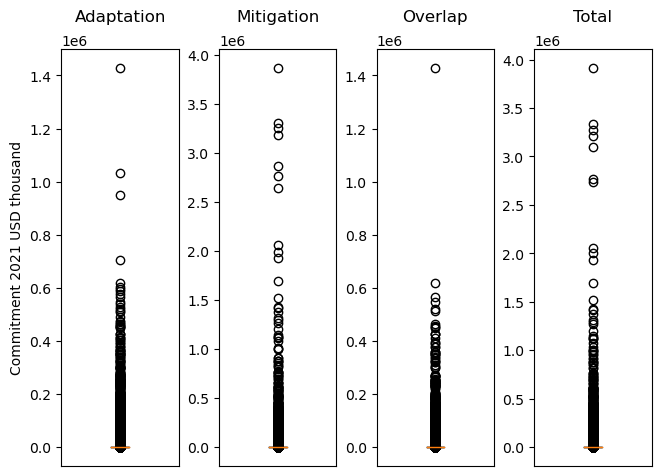

In [8]:
fig , axs = plt.subplots(1,4, figsize=(6.5, 4.65), layout='constrained')

axs[0].boxplot(acase_0_df[acase_0_df.columns[0]])
axs[0].tick_params(labelbottom=False, bottom=False)
axs[0].set_title('Adaptation', pad = 20)
axs[0].set_ylabel('Commitment 2021 USD thousand')

axs[1].boxplot(acase_0_df[acase_0_df.columns[1]])
axs[1].tick_params(labelbottom=False, bottom=False)
axs[1].set_title('Mitigation', pad = 20)

axs[2].boxplot(acase_0_df[acase_0_df.columns[2]])
axs[2].tick_params(labelbottom=False, bottom=False)
axs[2].set_title('Overlap', pad = 20)

axs[3].boxplot(acase_0_df[acase_0_df.columns[3]])
axs[3].tick_params(labelbottom=False, bottom=False)
axs[3].set_title('Total', pad = 20)
plt.show()
plt.close()

Calculating the Z-Score for each element in each of the 4 variables.

In [22]:
acase_zscore = acase_0_df.apply(zscore)

In [48]:
#Number of outliers per variable:
acase_outliers = acase_zscore[(acase_zscore > 3) | (acase_zscore <-3)]
acase_outliers.count()

Adaptation-related development finance - Commitment - 2021 USD thousand    1395
Mitigation-related development finance - Commitment - 2021 USD thousand    1098
Overlap - Commitment - 2021 USD thousand                                   1218
Climate-related development finance - Commitment - 2021 USD thousand       1321
dtype: int64

In [33]:
adaptation_zscore_outliers = acase_zscore[acase_zscore[acase_zscore.columns[0]]>3][acase_zscore.columns[0]].tolist()
mitigation_zscore_outliers = acase_zscore[acase_zscore[acase_zscore.columns[1]]>3][acase_zscore.columns[1]].tolist()
overlap_zscore_outliers = acase_zscore[acase_zscore[acase_zscore.columns[2]]>3][acase_zscore.columns[2]].tolist()
total_zscore_outliers = acase_zscore[acase_zscore[acase_zscore.columns[3]]>3][acase_zscore.columns[3]].tolist()

In [24]:
adaptation_zscore_outliers_idx = acase_zscore[acase_zscore[acase_zscore.columns[0]]>3][acase_zscore.columns[0]].index.tolist()
mitigation_zscore_outliers_idx = acase_zscore[acase_zscore[acase_zscore.columns[1]]>3][acase_zscore.columns[1]].index.tolist()
overlap_zscore_outliers_idx = acase_zscore[acase_zscore[acase_zscore.columns[2]]>3][acase_zscore.columns[2]].index.tolist()
total_zscore_outliers_idx = acase_zscore[acase_zscore[acase_zscore.columns[3]]>3][acase_zscore.columns[3]].index.tolist()

Applying the IQR method to each element in each of the 4 variables.

In [28]:
adaptation_iqr_outliers_idx = iqr(acase_0_df[acase_0_df.columns[0]].tolist())[0]
mitigation_iqr_outliers_idx = iqr(acase_0_df[acase_0_df.columns[1]].tolist())[0]
overlap_iqr_outliers_idx = iqr(acase_0_df[acase_0_df.columns[2]].tolist())[0]
total_iqr_outliers_idx = iqr(acase_0_df[acase_0_df.columns[3]].tolist())[0]

In [29]:
print(acase_0_df.columns[0],len(adaptation_iqr_outliers_idx))
print(acase_0_df.columns[1],len(mitigation_iqr_outliers_idx))
print(acase_0_df.columns[2],len(overlap_iqr_outliers_idx))
print(acase_0_df.columns[3],len(total_iqr_outliers_idx))

Adaptation-related development finance - Commitment - 2021 USD thousand 27756
Mitigation-related development finance - Commitment - 2021 USD thousand 28846
Overlap - Commitment - 2021 USD thousand 34495
Climate-related development finance - Commitment - 2021 USD thousand 27098


In [30]:
adaptation_iqr_outliers = iqr(acase_0_df[acase_0_df.columns[0]].tolist())[1]
mitigation_iqr_outliers = iqr(acase_0_df[acase_0_df.columns[1]].tolist())[1]
overlap_iqr_outliers = iqr(acase_0_df[acase_0_df.columns[2]].tolist())[1]
total_iqr_outliers = iqr(acase_0_df[acase_0_df.columns[3]].tolist())[1]

Are the Z-Score and the IQR outliers the same?

In [31]:
diff_adaptation = list(set(adaptation_zscore_outliers_idx) - set(adaptation_iqr_outliers_idx))
diff_mitigation = list(set(mitigation_zscore_outliers_idx) - set(mitigation_iqr_outliers_idx))
diff_overlap = list(set(overlap_zscore_outliers_idx) - set(overlap_iqr_outliers_idx))
diff_total = list(set(total_zscore_outliers_idx) - set(total_iqr_outliers_idx))

In [32]:
print("Difference between Z-Score and IQR for Adaptation: ", diff_adaptation)
print("Difference between Z-Score and IQR for Mitigation: ", diff_mitigation)
print("Difference between Z-Score and IQR for Overlap: ", diff_overlap)
print("Difference between Z-Score and IQR for Total: ", diff_total)

Difference between Z-Score and IQR for Adaptation:  []
Difference between Z-Score and IQR for Mitigation:  []
Difference between Z-Score and IQR for Overlap:  []
Difference between Z-Score and IQR for Total:  []


Values with the highest Z-Score and IQR:

In [40]:
adaptation_iqr_up_diff  = iqr(acase_0_df[acase_0_df.columns[0]].tolist())[2]
adaptation_iqr_low_diff  = iqr(acase_0_df[acase_0_df.columns[0]].tolist())[3]
mitigation_iqr_up_diff= iqr(acase_0_df[acase_0_df.columns[1]].tolist())[2]
mitigation_iqr_low_diff = iqr(acase_0_df[acase_0_df.columns[1]].tolist())[3]
overlap_iqr_up_diff= iqr(acase_0_df[acase_0_df.columns[2]].tolist())[2]
overlap_iqr_low_diff = iqr(acase_0_df[acase_0_df.columns[2]].tolist())[3]
total_iqr_up_diff = iqr(acase_0_df[acase_0_df.columns[3]].tolist())[2]
total_iqr_low_diff = iqr(acase_0_df[acase_0_df.columns[3]].tolist())[3]

2.2) Case B and C (binary variables/fields)

Checking the unique values in the Case B and C variables

In [63]:
bcase_0_df.stack().unique()

array([1., 0.])

In [64]:
ccase_0_df.stack().unique()

array([1., 0.])

2.3) Case D (integer variables/fields)

Checking the unique values in the Case D variables

In [65]:
dcase_0_df.stack().unique()

array([ 0,  1,  2,  3,  4,  5,  7,  6, 10,  9,  8, 13, 15, 14, 11, 12, 17,
       18, 16, 19, 22, 20, 24, 21, 25, 28, 26, 27, 29, 33, 23],
      dtype=int64)

2.4) Labels (integer variables/fields)

In [8]:
labels_0_df.stack().unique()

array([0., 1.])

### 3) Check for multivariate outliers

The first step is to concatenate all variables

In [8]:
allcases_df = pd.concat([acase_0_df, bcase_0_df, ccase_0_df, dcase_0_df], axis = 1)

In [7]:
def calc_maha (x, data):
    y_mu = x - np.mean(data)
    cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()

In [27]:
allcases_array = allcases_df.to_numpy()

In [28]:
mean = np.mean(allcases_array, axis = 1)

In [29]:
cov = np.cov(allcases_array.T)

In [33]:
mahalanobis_dist = [mahalanobis(x, mean, np.linalg.inv(cov)) for x in allcases_array]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\spatial\distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


KeyboardInterrupt: 

It seems it is not possible to invert the covariance matrix since it is a singular matrix with 0 determinant, which means some variables are interdependent. In order to identify interdependent variables, the correlation between all variables will be calculated.

In [11]:
corr_matrix = allcases_df.corr().abs()

In [16]:
#In case the matrix has already been calculated:
#corr_matrix = pd.read_csv("corr_matrix.csv", index_col = 0)

In [20]:
corr_matrix.index

Index(['Adaptation-related development finance - Commitment - 2021 USD thousand',
       'Mitigation-related development finance - Commitment - 2021 USD thousand',
       'Overlap - Commitment - 2021 USD thousand',
       'Climate-related development finance - Commitment - 2021 USD thousand',
       'Year_2000', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004',
       'Year_2005',
       ...
       'Text_établissement', 'Text_états', 'Text_étude', 'Text_études',
       'Text_été', 'Text_évaluation', 'Text_évaluations', 'Text_événements',
       'Text_être', 'Text_œuvre'],
      dtype='object', length=5531)

In [81]:
corr_matrix_lt = pd.DataFrame(np.tril(corr_matrix,-1), columns = corr_matrix.columns, index = corr_matrix.index)

Number of values higher than 0.9 per variable

In [82]:
corr_count = pd.DataFrame(corr_matrix_lt[corr_matrix_lt>0.9].count(), columns = ["count"])
corr_count["variables"] = corr_count.index

In [109]:
corr_var_names = dict()
count = []
for i in range(0,20):
    vnames = corr_count[corr_count["count"]==i]["variables"].to_list()
    print("Number of variables with ", i, " values higher than 0.9: ",len(vnames))
    corr_var_names[str(i)] = vnames
    count.append(len(vnames))
print(sum(count))

Number of variables with  0  values higher than 0.9:  4574
Number of variables with  1  values higher than 0.9:  693
Number of variables with  2  values higher than 0.9:  138
Number of variables with  3  values higher than 0.9:  80
Number of variables with  4  values higher than 0.9:  8
Number of variables with  5  values higher than 0.9:  5
Number of variables with  6  values higher than 0.9:  6
Number of variables with  7  values higher than 0.9:  2
Number of variables with  8  values higher than 0.9:  2
Number of variables with  9  values higher than 0.9:  2
Number of variables with  10  values higher than 0.9:  3
Number of variables with  11  values higher than 0.9:  3
Number of variables with  12  values higher than 0.9:  2
Number of variables with  13  values higher than 0.9:  5
Number of variables with  14  values higher than 0.9:  1
Number of variables with  15  values higher than 0.9:  2
Number of variables with  16  values higher than 0.9:  2
Number of variables with  17  val

Variables with a number of correlated variables higher than 7 are selected.

In [115]:
var_to_remove = []
for i in range(8,20):
    var = corr_var_names[str(i)]
    var_to_remove = var_to_remove + var

Variables are removed from the original dataset and the calculation of the Mahalanobis distance is tested again

In [118]:
allcases2_df = allcases_df.drop(columns=var_to_remove)

In [119]:
allcases2_array = allcases2_df.to_numpy()

In [121]:
mean2 = np.mean(allcases2_array, axis = 1)

In [122]:
cov2 = np.cov(allcases2_array.T)

KeyboardInterrupt: 

In [ ]:
mahalanobis2_dist = [mahalanobis(x, mean2, np.linalg.inv(cov2)) for x in allcases2_array]

### 4) Standardisation and Normalisation
Standarization

In [ ]:
scaler = RobustScaler()

In [ ]:
acase_0_sca_df = pd.DataFrame(scaler.fit_transform(acase_0_df), columns = acase_0_df.columns)

In [ ]:
acase_0_sca_df.describe()

In [ ]:
dcase_0_sca_df = pd.DataFrame(scaler.fit_transform(dcase_0_df), columns = dcase_0_df.columns)

In [ ]:
dcase_0_sca_df.describe()

In [ ]:
Normalization

In [ ]:
normalizer = Normalizer()

In [ ]:
acase_0_norm_df = pd.DataFrame(normalizer.fit_transform(acase_0_df), columns = acase_0_df.columns)

In [ ]:
acase_0_norm_df.describe()

In [ ]:
acase_0_norm_df.describe()

In [ ]:
acase_0_norm_df.max()

In [ ]:
dcase_0_norm_df = pd.DataFrame(normalizer.fit_transform(dcase_0_df), columns = dcase_0_df.columns)

In [ ]:
dcase_0_norm_df.describe()

### 5) Dimensionality reduction